### Import modules and connect to VogueDB

In [2]:
import os
import sys
import pymongo
import pandas
import pprint

import ipywidgets as widgets
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact, interact_manual

In [3]:
pp = pprint.PrettyPrinter(width=41, compact=True)

client = pymongo.MongoClient(host='mongodb://host.docker.internal', port=27032)

db = client.vogue

### load application and sample collection

In [4]:
application_df = pandas.DataFrame(list(db.application_tag.find()))

# try printing 
# pp.pprint(application_df.shape)

In [5]:
samples_df = pandas.DataFrame(list(db.sample.find()))

# try printing what we have in the data frame
# pp.pprint(samples_df.shape)
pp.pprint(list(samples_df))

['_id', 'strain', 'source', 'customer',
 'priority', 'initial_qc',
 'application_tag', 'category',
 'received_date', 'added', 'library_qc',
 'sequencing_qc', 'sequenced_date',
 'prepared_date', 'prepped_to_sequenced',
 'received_to_prepped',
 'microbial_library_concentration',
 'updated', 'delivery_date',
 'sequenced_to_delivered',
 'received_to_delivered', 'amount',
 'amount-concentration',
 'library_size_pre_hyb',
 'library_size_post_hyb', 'nr_defrosts',
 'nr_defrosts-concentration', 'lotnr',
 'family']


### Read all bioinfo data

In [6]:
bioinfo_samples = list()
workflow = "mip"
for sample_dict in list(db.bioinfo_samples.find()):
    if "mip" not in sample_dict:
        continue
    new_sample_dict = dict()
    new_sample_dict['_id'] = sample_dict.get("_id")
    new_sample_dict['added'] = sample_dict.get("added")
    for mip_key,mip_value in sample_dict[workflow].items():
        if isinstance(mip_value, dict):
            for k,v in mip_value.items():
                new_sample_dict[k] = v
    bioinfo_samples.append(new_sample_dict)

In [10]:
complete_df = pandas.merge(pandas.DataFrame(bioinfo_samples), samples_df, on="_id")
# try printing what we have in the data frame
pp.pprint(list(complete_df))

['_id', 'added_x',
 'UNPAIRED_READ_UNIQUE',
 'UNPAIRED_READ_DUPLICATES',
 'SECONDARY_OR_SUPPLEMENTARY_RDS',
 'UNMAPPED_READS',
 'ESTIMATED_LIBRARY_SIZE',
 'READ_PAIR_OPTICAL_DUPLICATES',
 'READ_PAIRS_EXAMINED',
 'UNPAIRED_READS_EXAMINED',
 'READ_PAIR_NOT_OPTICAL_DUPLICATES',
 'READ_PAIR_DUPLICATES',
 'PERCENT_DUPLICATION', 'LIBRARY',
 'READ_PAIR_UNIQUE',
 'PCT_PF_READS_IMPROPER_PAIRS',
 'PF_MISMATCH_RATE', 'PF_READS_ALIGNED',
 'PF_HQ_ALIGNED_READS',
 'READS_ALIGNED_IN_PAIRS',
 'MEAN_READ_LENGTH', 'BAD_CYCLES',
 'PF_INDEL_RATE', 'PF_ALIGNED_BASES',
 'PCT_PF_READS',
 'PF_READS_IMPROPER_PAIRS', 'PF_READS',
 'PCT_ADAPTER', 'PCT_PF_READS_ALIGNED',
 'READ_GROUP',
 'PCT_READS_ALIGNED_IN_PAIRS',
 'TOTAL_READS', 'PCT_CHIMERAS',
 'PF_HQ_ERROR_RATE', 'SAMPLE',
 'PF_NOISE_READS', 'STRAND_BALANCE',
 'PF_HQ_ALIGNED_Q20_BASES', 'CATEGORY',
 'PF_HQ_MEDIAN_MISMATCHES',
 'PF_HQ_ALIGNED_BASES',
 'WIDTH_OF_20_PERCENT',
 'WIDTH_OF_30_PERCENT',
 'WIDTH_OF_40_PERCENT',
 'WIDTH_OF_70_PERCENT',
 'WIDTH_OF_80_P

In [8]:
# Example print amounts larger than 1000
samples_df.loc[samples_df["amount"].astype("float64") > 1000]

,_id,strain,source,customer,priority,initial_qc,application_tag,category,received_date,added,...,sequenced_to_delivered,received_to_delivered,amount,amount-concentration,library_size_pre_hyb,library_size_post_hyb,nr_defrosts,nr_defrosts-concentration,lotnr,family
2,ACC6874A17,NaN,blood,cust002,standard,True,WGSLIFC030,wgs,2020-04-30,2020-05-13 10:54:21.228,...,2.0,20.0,2016.600,3.418584,NaN,NaN,NaN,NaN,NaN,NaN
84,ACC6874A14,NaN,blood,cust002,standard,True,WGSLIFC030,wgs,2020-04-30,2020-05-13 10:55:42.244,...,2.0,20.0,2766.850,4.679748,NaN,NaN,NaN,NaN,NaN,NaN
105,ACC6856A6,NaN,muscle,cust003,standard,True,WGSLIFC030,wgs,2020-04-20,2020-05-13 10:55:54.476,...,0.0,22.0,1147.680,10.218661,NaN,NaN,NaN,NaN,NaN,NaN
222,ACC6874A15,NaN,blood,cust002,standard,True,WGSLIFC030,wgs,2020-04-30,2020-05-13 10:56:44.687,...,2.0,20.0,1625.150,2.662573,NaN,NaN,NaN,NaN,NaN,NaN
574,ACC2834A1,NA,blood,cust002,standard,False,WGSLIFC030,wgs,2017-06-29,2020-05-13 15:12:14.387,...,3.0,11.0,1049.400,8.440000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44270,ACC7317A7,NaN,blood,cust002,standard,True,WGTLIFC030,wgs,2020-12-04,2020-12-05 00:02:47.613,...,NaN,NaN,2816.912,8.931850,NaN,NaN,NaN,NaN,NaN,NaN
44387,ACC7334A1,NaN,blood,cust073,express,True,WGSLIFC030,wgs,2020-12-08,2020-12-11 09:29:59.419,...,1.0,6.0,2268.000,8.632705,NaN,NaN,NaN,NaN,NaN,NaN
44402,ACC7333A1,NaN,blood,cust004,standard,True,WGSLIFC030,wgs,2020-12-09,2020-12-11 09:31:13.554,...,NaN,NaN,23547.000,8.398209,NaN,NaN,NaN,NaN,NaN,NaN
44425,ACC7333A3,NaN,blood,cust004,standard,True,WGSLIFC030,wgs,2020-12-09,2020-12-11 09:32:07.589,...,NaN,NaN,19836.000,10.472986,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Example create a table
@interact
def show_concenteration(column="library_size_pre_hyb", x=widgets.IntSlider(min=0, max=600, step=1, value=10)):
    return samples_df.loc[samples_df[column].astype("float64") > x]

interactive(children=(Text(value='library_size_pre_hyb', description='column'), IntSlider(value=10, descriptio…

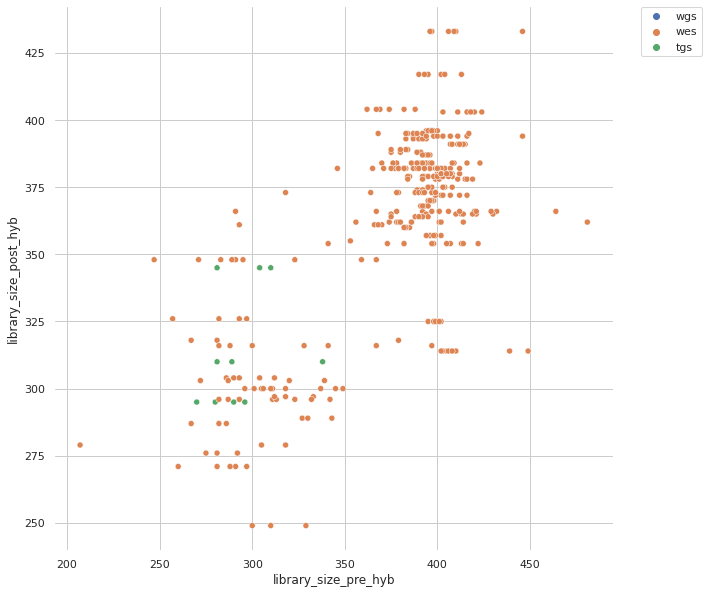

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=complete_df, x="library_size_pre_hyb", y="library_size_post_hyb", hue="category")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)